In [108]:
# Import Dependencys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder

In [109]:
# Load the data

co2_data = pd.read_csv('co2.csv')

In [110]:
co2_data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [111]:
co2_data.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [112]:
# Analyzing null values

co2_data.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [113]:
# As the make and model of the car are not important for the prediction, we can drop them

co2_data = co2_data.drop(['Make', 'Model'], axis=1)

In [114]:
# Analyzing vehicle class

co2_data['Vehicle Class'].value_counts()

Vehicle Class
SUV - SMALL                 1217
MID-SIZE                    1133
COMPACT                     1022
SUV - STANDARD               735
FULL-SIZE                    639
SUBCOMPACT                   606
PICKUP TRUCK - STANDARD      538
TWO-SEATER                   460
MINICOMPACT                  326
STATION WAGON - SMALL        252
PICKUP TRUCK - SMALL         159
MINIVAN                       80
SPECIAL PURPOSE VEHICLE       77
VAN - PASSENGER               66
STATION WAGON - MID-SIZE      53
VAN - CARGO                   22
Name: count, dtype: int64

In [115]:
# As the vehicle class is a categorical variable, we can use Ordinal encoding to convert it to a numerical variable

# Here I am using sklearn's Ordinal encoding to convert the 'Vehicle Class' column to a numerical column

encoder = OrdinalEncoder(categories=[['VAN - CARGO', 'SUBCOMPACT', 'SUV - SMALL', 'STATION WAGON - MID-SIZE', 'COMPACT', 'MID-SIZE', 'PICKUP TRUCK - SMALL', 'PICKUP TRUCK - STANDARD', 'STATION WAGON - SMALL', 'SUV - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE', 'MINICOMPACT', 'VAN - PASSENGER', 'FULL-SIZE', 'TWO-SEATER']])

co2_data['Vehicle Class'] = encoder.fit_transform(co2_data[['Vehicle Class']])

co2_data.head()

,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,4.0,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,4.0,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,4.0,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2.0,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2.0,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


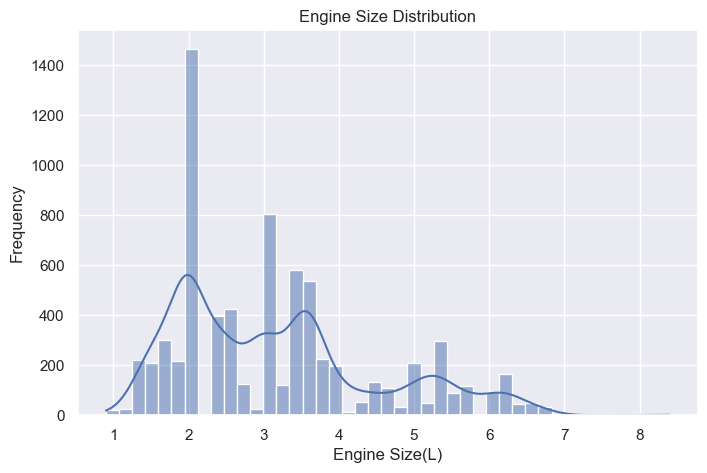

In [116]:
# Analyzing Engine Size

sns.set()
plt.figure(figsize=(8, 5))
sns.histplot(co2_data['Engine Size(L)'], kde=True)

plt.xlabel('Engine Size(L)')
plt.ylabel('Frequency')
plt.title('Engine Size Distribution')
plt.show()

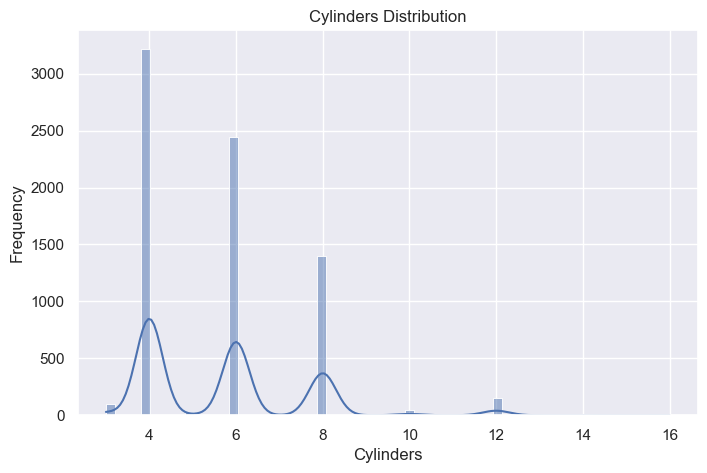

In [117]:
# Analyzing Cylinders

plt.figure(figsize=(8, 5))
sns.histplot(co2_data['Cylinders'], kde=True)

plt.xlabel('Cylinders')
plt.ylabel('Frequency')
plt.title('Cylinders Distribution')

plt.show()

In [118]:

co2_data['Cylinders'].value_counts()

Cylinders
4     3220
6     2446
8     1402
12     151
3       95
10      42
5       26
16       3
Name: count, dtype: int64

In [119]:
# Analyzing Transmission

co2_data['Transmission'].value_counts()

Transmission
AS6     1324
AS8     1211
M6       901
A6       789
A8       490
AM7      445
A9       339
AS7      319
AV       295
M5       193
AS10     168
AM6      132
AV7      118
AV6      113
M7        91
A5        84
AS9       77
A4        65
AM8       62
A7        53
AV8       39
A10       31
AS5       26
AV10      11
AM5        4
AM9        3
AS4        2
Name: count, dtype: int64

In [120]:
# As the transmission is a categorical variable, we can use Ordinal encoding to convert it to a numerical variable

# Here I am using sklearn's Ordinal encoding to convert the 'Transmission' column to a numerical column

encoder = OrdinalEncoder(categories=[['AS5', 'M6', 'AV7', 'AS6', 'A6', 'AM7', 'A7', 'AS8', 'A8', 'AS7', 'A4', 'A5',
    'AM6', 'AV8', 'AS9', 'AV', 'A9', 'M7', 'A10', 'AM5', 'AM8', 'AS4', 'AS10', 'A',
    'AV6', 'AM9', 'AM', 'AS', 'AV10', 'M5', 'A11', 'AV9', 'AS2', 'A12', 'AS3', 'M',
    'AMT-9', 'AMT-6', 'AMT-8', 'AMT-7', 'AMT-5', 'AMT-10', 'AMT-4']])

co2_data['Transmission'] = encoder.fit_transform(co2_data[['Transmission']])

co2_data.head()

,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,4.0,2.0,4,0.0,Z,9.9,6.7,8.5,33,196
1,4.0,2.4,4,1.0,Z,11.2,7.7,9.6,29,221
2,4.0,1.5,4,2.0,Z,6.0,5.8,5.9,48,136
3,2.0,3.5,6,3.0,Z,12.7,9.1,11.1,25,255
4,2.0,3.5,6,3.0,Z,12.1,8.7,10.6,27,244


In [121]:
# Analyzing Fuel Type

co2_data['Fuel Type'].value_counts()

Fuel Type
X    3637
Z    3202
E     370
D     175
N       1
Name: count, dtype: int64

In [122]:
# As the fuel type is a categorical variable, we can use Ordinal encoding to convert it to a numerical variable

# Here I am using sklearn's Ordinal encoding to convert the 'Fuel Type' column to a numerical column

encoder = OrdinalEncoder(categories=[['Z', 'D', 'X', 'E','N']])

co2_data['Fuel Type'] = encoder.fit_transform(co2_data[['Fuel Type']])

co2_data.head()

,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,4.0,2.0,4,0.0,0.0,9.9,6.7,8.5,33,196
1,4.0,2.4,4,1.0,0.0,11.2,7.7,9.6,29,221
2,4.0,1.5,4,2.0,0.0,6.0,5.8,5.9,48,136
3,2.0,3.5,6,3.0,0.0,12.7,9.1,11.1,25,255
4,2.0,3.5,6,3.0,0.0,12.1,8.7,10.6,27,244


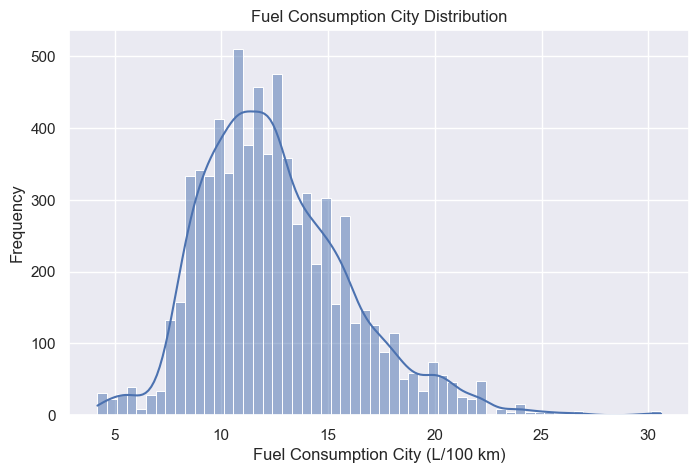

In [123]:
# Analyzing Fuel Consumption city

plt.figure(figsize=(8, 5))
sns.histplot(co2_data['Fuel Consumption City (L/100 km)'], kde=True)

plt.xlabel('Fuel Consumption City (L/100 km)')
plt.ylabel('Frequency')
plt.title('Fuel Consumption City Distribution')

plt.show()

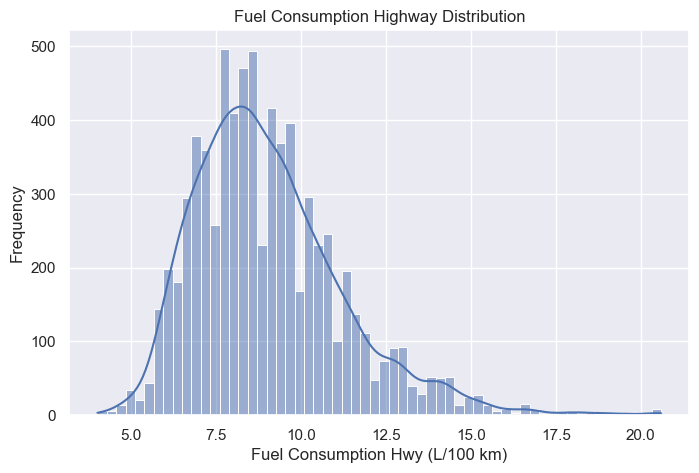

In [124]:
# Analyzing Fuel Consumption Highway

plt.figure(figsize=(8, 5))
sns.histplot(co2_data['Fuel Consumption Hwy (L/100 km)'], kde=True)

plt.xlabel('Fuel Consumption Hwy (L/100 km)')
plt.ylabel('Frequency')
plt.title('Fuel Consumption Highway Distribution')

plt.show()

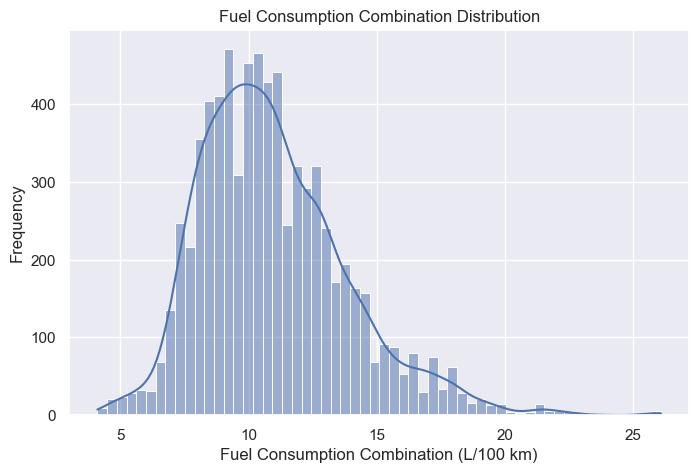

In [125]:
# Analyzing Fuel Consumption combined

plt.figure(figsize=(8, 5))
sns.histplot(co2_data['Fuel Consumption Comb (L/100 km)'], kde=True)

plt.xlabel('Fuel Consumption Combination (L/100 km)')
plt.ylabel('Frequency')
plt.title('Fuel Consumption Combination Distribution')

plt.show()

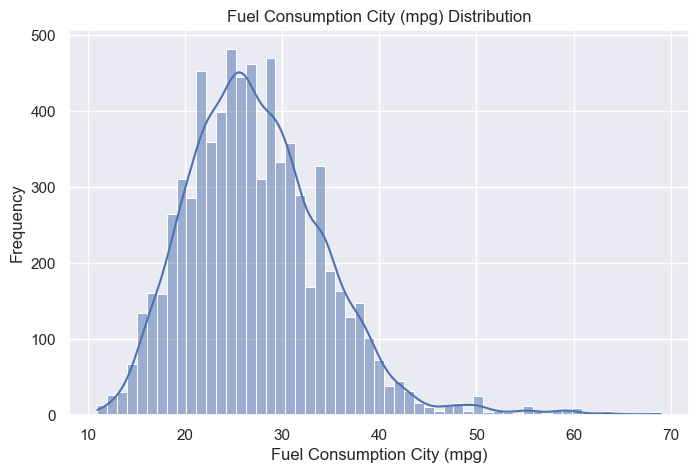

In [126]:
# Analyzing Fuel Consumption combined (mpg)

plt.figure(figsize=(8, 5))
sns.histplot(co2_data['Fuel Consumption Comb (mpg)'], kde=True)

plt.xlabel('Fuel Consumption City (mpg)')
plt.ylabel('Frequency')
plt.title('Fuel Consumption City (mpg) Distribution')

plt.show()

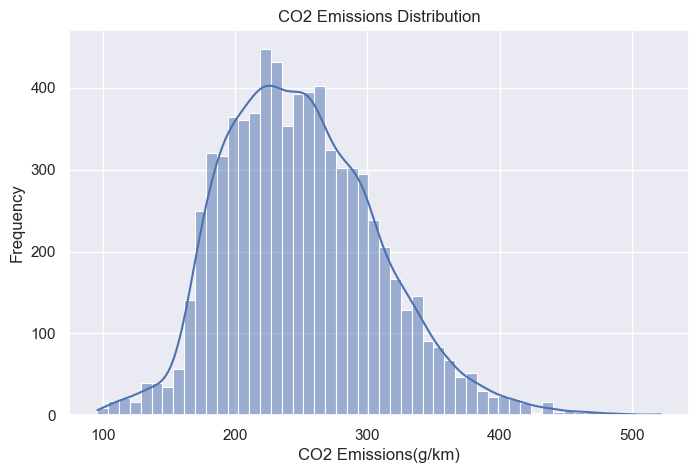

In [127]:
# Analyzing CO2 Emissions

plt.figure(figsize=(8, 5))
sns.histplot(co2_data['CO2 Emissions(g/km)'], kde=True)

plt.xlabel('CO2 Emissions(g/km)')
plt.ylabel('Frequency')
plt.title('CO2 Emissions Distribution')
plt.show()

In [128]:
# Spliting the data into training and testing data

X = co2_data.drop('CO2 Emissions(g/km)', axis=1)
Y = co2_data['CO2 Emissions(g/km)']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [129]:
# Model Selection

regressor = LinearRegression()

In [130]:
# Train the model

regressor.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# Predict the train data

train_predictions = regressor.predict(X_train)
train_score = r2_score(Y_train, train_predictions)

print('Train Score:', train_score)

Train Score: 0.9134797524964847


In [134]:
# Predict the test data

test_predictions = regressor.predict(X_test)
test_score = r2_score(Y_test, test_predictions)

print('Test Score:', test_score)

Test Score: 0.9110020206248335


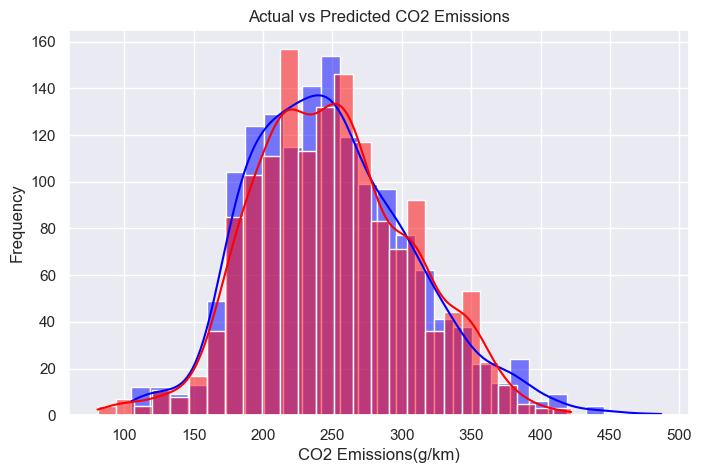

In [138]:
# Plotting the results

plt.figure(figsize=(8, 5))
sns.histplot(Y_test, kde=True, color='blue', label='Actual CO2 Emissions')
sns.histplot(test_predictions, kde=True, color='red', label='Predicted CO2 Emissions')
plt.xlabel('CO2 Emissions(g/km)')
plt.ylabel('Frequency')
plt.title('Actual vs Predicted CO2 Emissions')

plt.show()

In [140]:
# Model Evaluation

data=np.array([[2.0,3.5,6,3.0,0.0,12.7,9.1,11.1,25]])

co2_emission = regressor.predict(data.reshape(1, -1))

print('Predicted CO2 Emission:', co2_emission[0])

Predicted CO2 Emission: 270.42813412758244


c:\Users\DIPAYAN SARKAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
